# Problem StateMent

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [89]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [90]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [91]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

## About  the columns:
### Target
- `W`:-- The number of wins 
### Feature:
- `R`:- Runs : scored: number of times a player crosses home plate.
- `AB`:-  At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
- `H`:-  Hit: reaching base because of a batted, fair ball without error by the defense.
- `2B`:- Double: hits on which the batter reaches second base safely without the contribution of a fielding error.
- `3B` :- Triple: hits on which the batter reaches third base safely without the contribution of a fielding error.
- `HR`:- Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
- `BB`:- Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
- `SO`:- PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance.
- `SB`: Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.
- `RA`:- Run average: number of runs allowed times nine divided by innings pitched.
- `ER`:- Earned run: number of runs that did not occur as a result of errors or passed balls.
- `ERA`:- Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
- `CG`:- Complete game: number of games where player was the only pitcher for their team.
- `SHO`:- Shutout: number of complete games pitched with no runs allowed.
- `SV`:- Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
- `E` :- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

In [92]:
## Let's check how big our dataset is
df.shape

(30, 17)

There are only 30 column in our dataset and 17 column including target.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## Observation:
- There are all columns are int dtype except ERA is float data type.
-  Seems there are no nulls present in our dataset.

### Checking any duplicates:


In [94]:
df.duplicated().any()

False

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64


<AxesSubplot:xlabel='W', ylabel='count'>

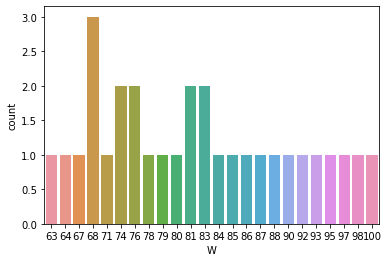

In [95]:
print(df.W.value_counts())
sns.countplot(df.W)

As we can see that there are only 30 rows present in our dataset, and our target variable is descrete dataset. So that it is good practice to use regression model to get predictions.

## Checking Nulls

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


<AxesSubplot:>

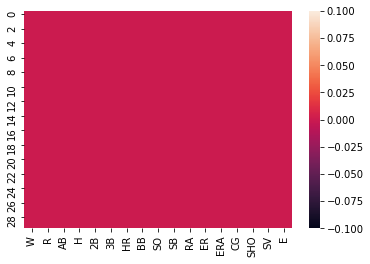

In [96]:
print(df.isna().sum())
sns.heatmap(df.isna())

Great!! There are no null present in our dataset.

In [97]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Some features are positively correlate with  our target and some features are negative correlate with target. And similarly some features are less correlate with target and some are highly correlate with target.

# Summery of stats:


In [98]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Observation:
- In our target column `W` has minimum wins is 63  and maximum wins is  100. It mean that our Wins lie  between 63 to  100.
- IN `CG`, `SHO` and `E` features statistics are not acceptable because `CG` has mean 3.46 and std is 2.76 which  is not  in acceptable range. simililar for other two.
- Except above rest of features have good  statistics.

# EDA

<AxesSubplot:xlabel='H', ylabel='W'>

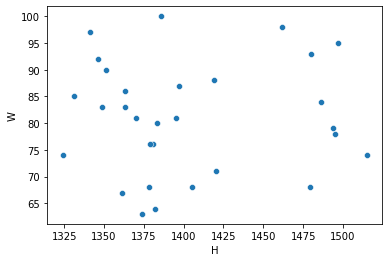

In [99]:
sns.scatterplot(x='H',y='W',data=df)

Seems there is no any trend between `W` and `H`.

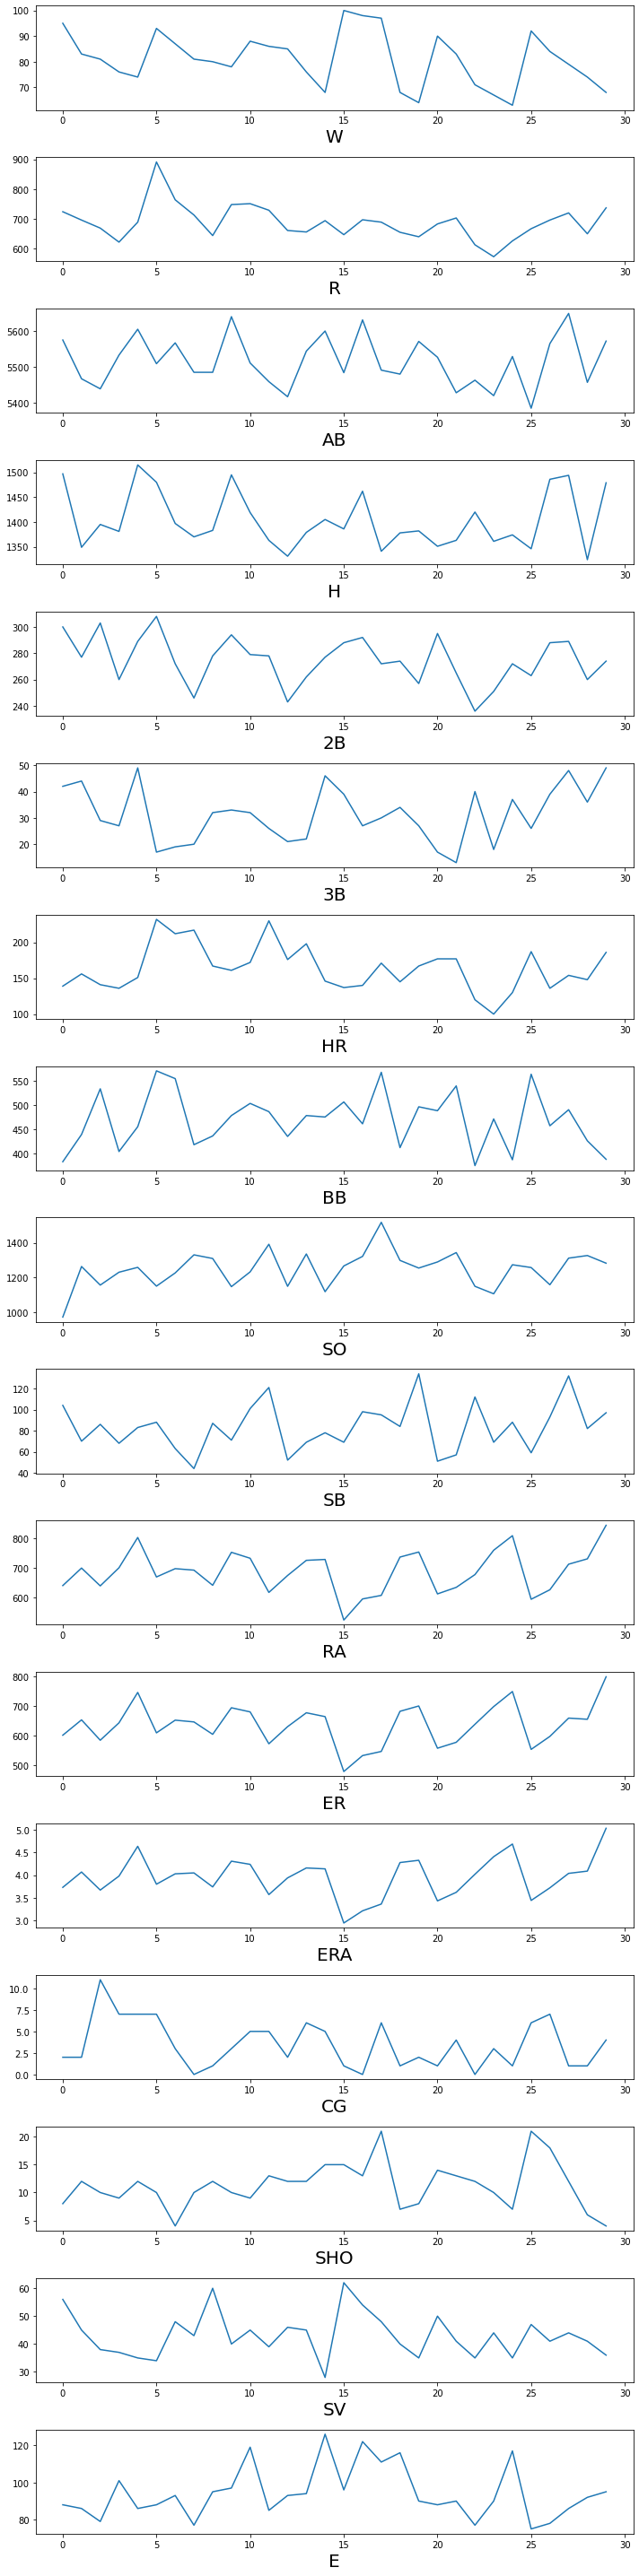

In [100]:
plt.figure(figsize=(20,20))
plotnumber=1
for  i in df.columns:
    if plotnumber<100:
        ax=plt.subplot(17,1,plotnumber)
        df[i].plot.line(figsize=(10,40))
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Outputs:
- column `R`(runs), it goes 900 as highest runs in once. Which is very far from rest of them.
- similary `CG`(complete game)  goes highest :- 11 at a time compare to rest of them.
- `ERA`(Earning average runs) drastically fall down once at 15.


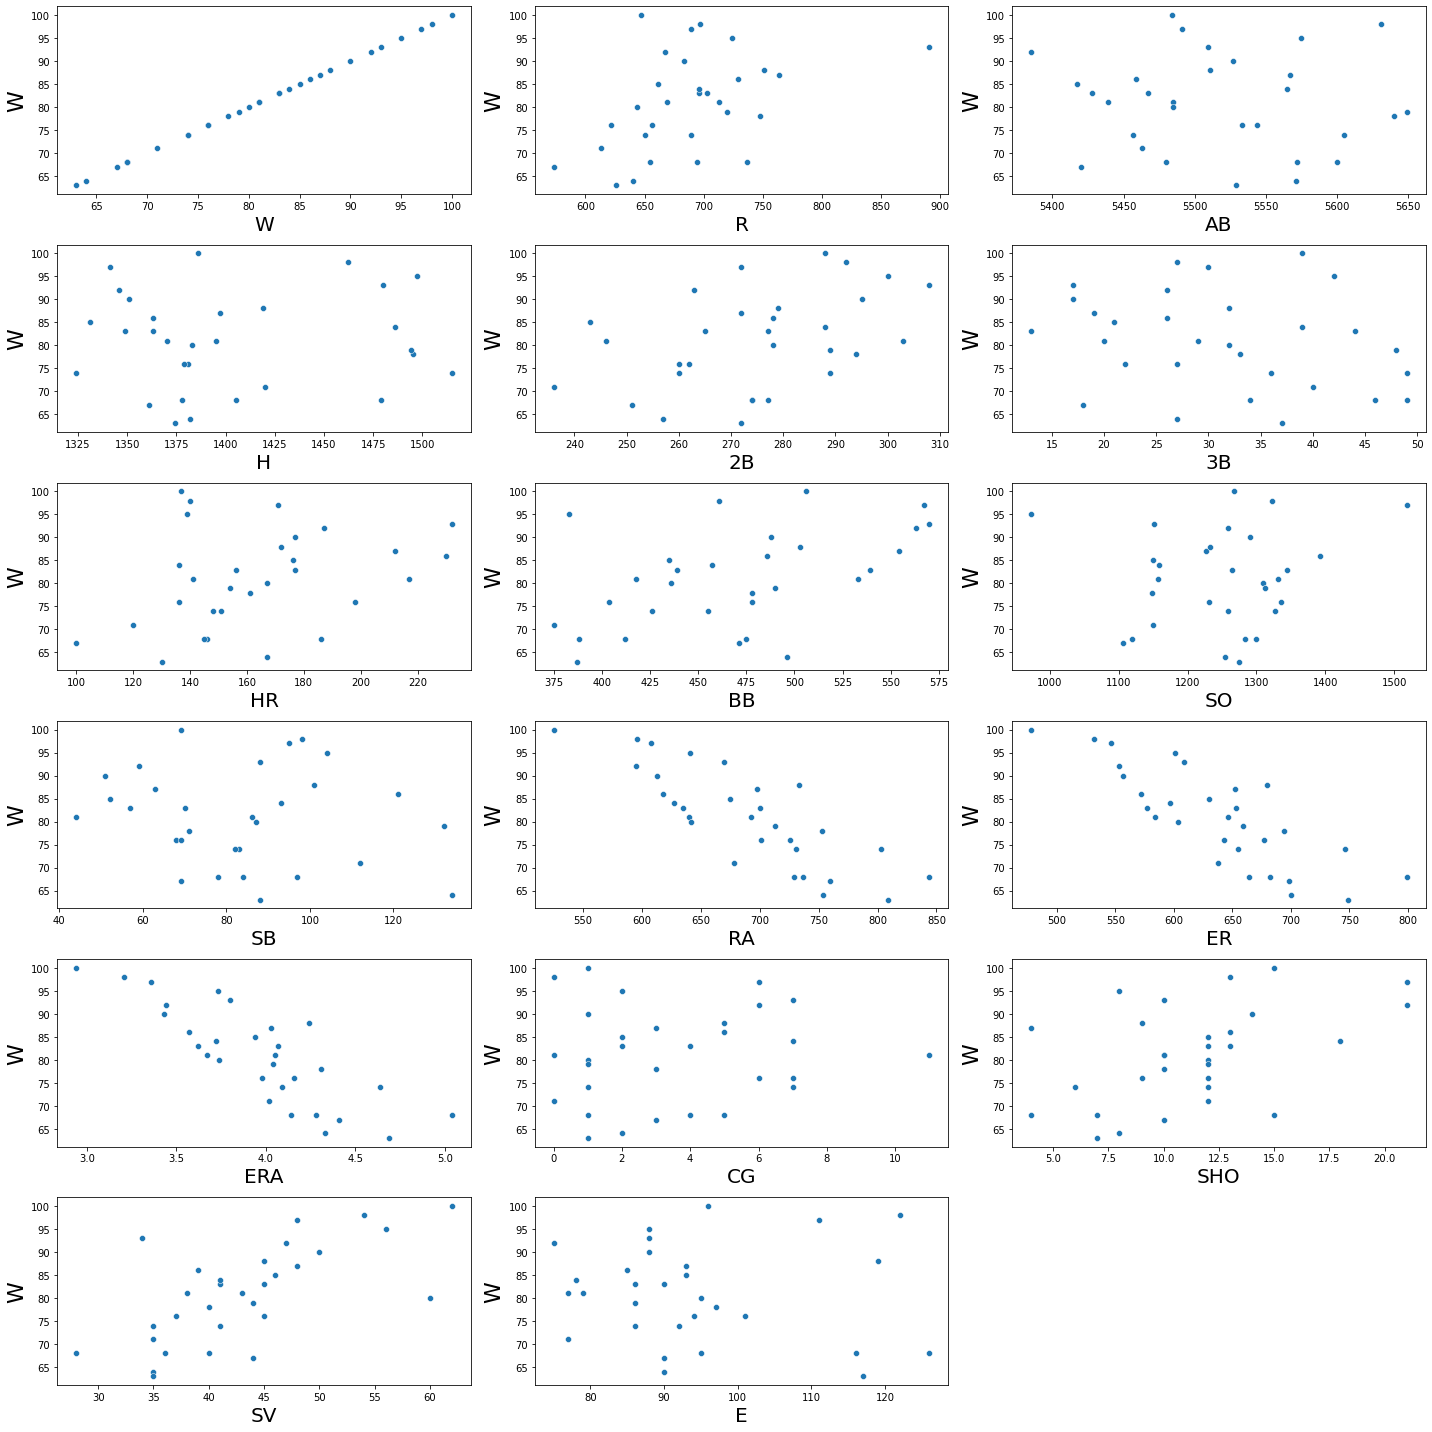

In [101]:
plt.figure(figsize=(20,20))
plotnumber=1
for  i in df.columns:
    if plotnumber<100:
        ax=plt.subplot(6,3,plotnumber)
        sns.scatterplot(x=df[i],y=df['W'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('W',fontsize=22)
    plotnumber+=1
plt.tight_layout()

## Observation from above graph:
- In graph W vs R, W vs HR, W vs BB, W vs SHO, we can see there is a strong positive relation between each-other. As W increase the R,HR,BB,SHO also increase in the same manner.
- In other hand W vs ERA, W vs RA and W vs ER, we can see there is a strong Negative relation between each-otherr. AS W decreases, the ERA,RA and ER increases.
- rest of the features are not showing a good relation with our target variable.

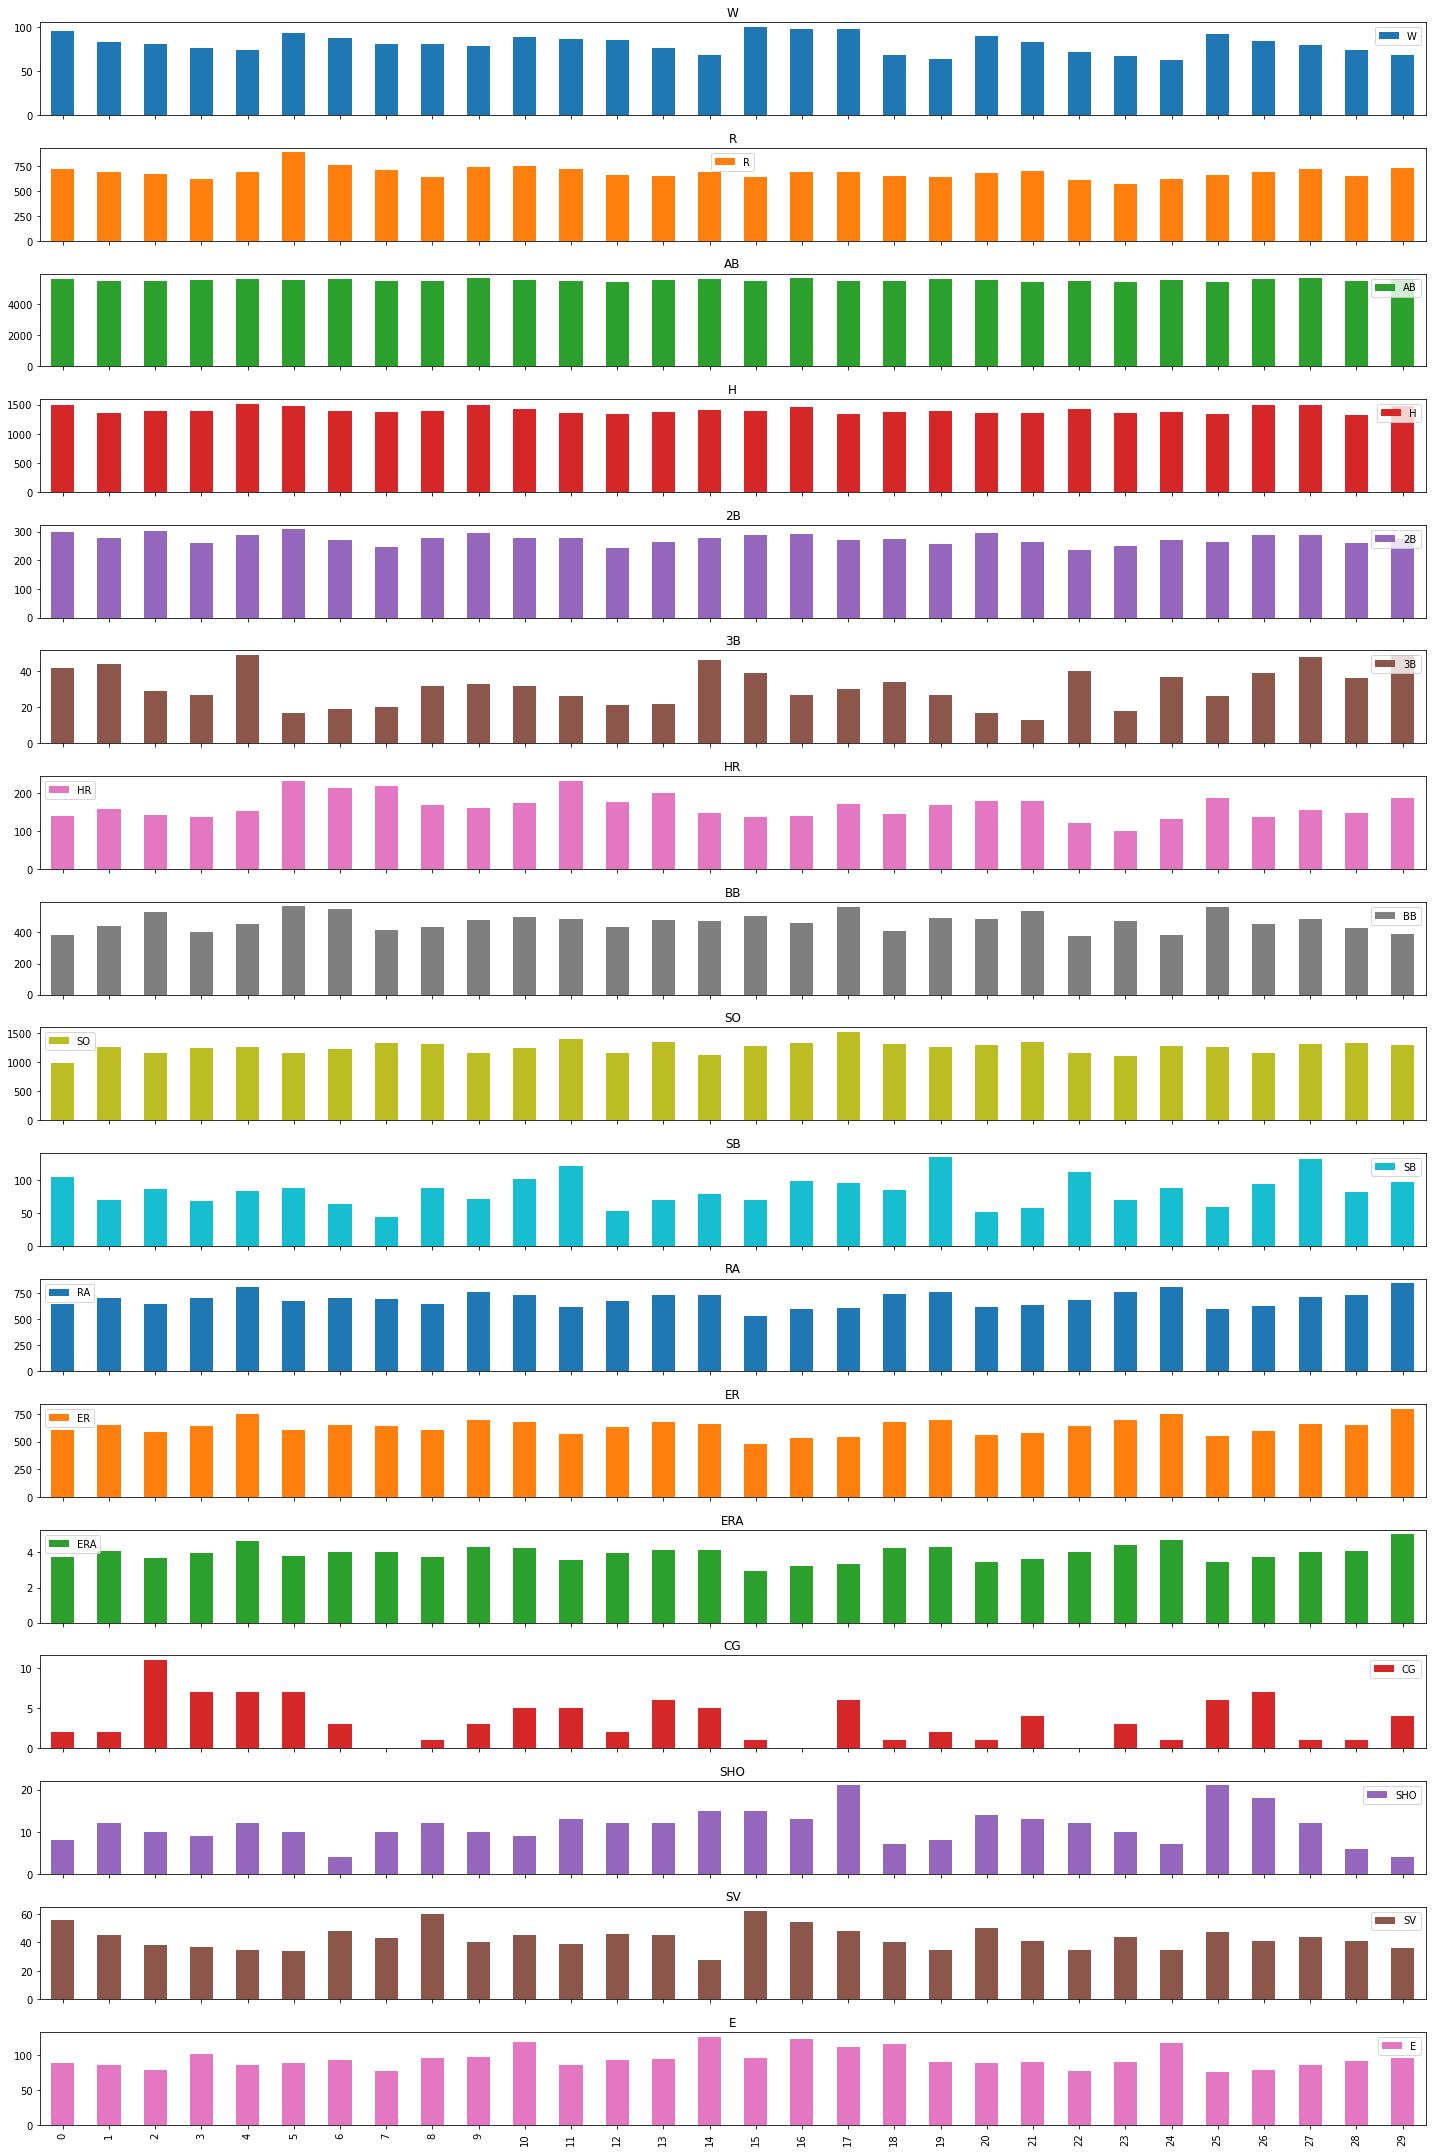

In [102]:
df.plot.bar(subplots=True,figsize=(20,30))
plt.tight_layout()

## Outputs:
- `SHO` has  many rows where it have zero value. But it is not secret the total number of complete-game outings by pitchers has been diminsing for a while. and also we have less or limited number of data present so we can not drop these rows. So it is acceptable.
- Seems rest of the feature has equaly distributed data and it is quite balanced.


Text(0.5, 1.0, 'Run Vs wins')

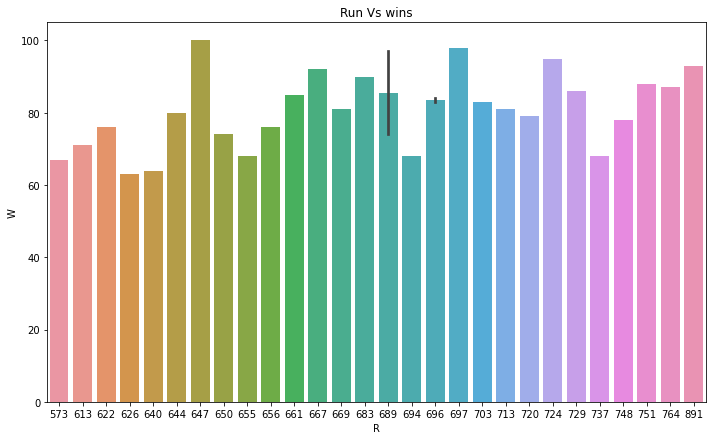

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x='R',y='W',data=df)
plt.tight_layout()
plt.title('Run Vs wins')

- 647 and 697 runs have most number of wins.

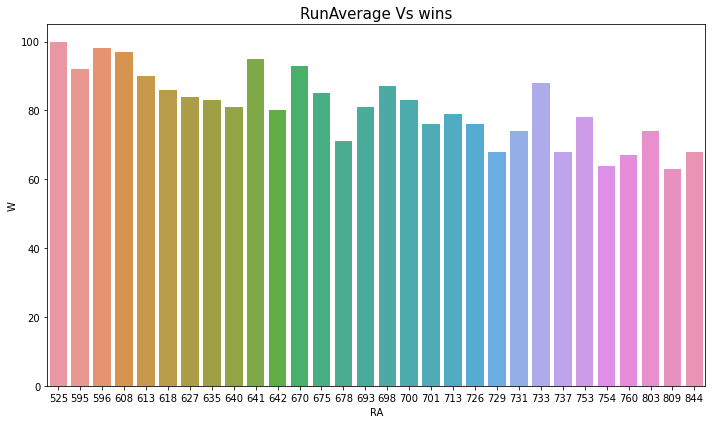

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['RA'],y=df['W'])
plt.title('RunAverage Vs wins',fontsize=15)

plt.tight_layout()

525 Average Runs has highest wins.

<AxesSubplot:>

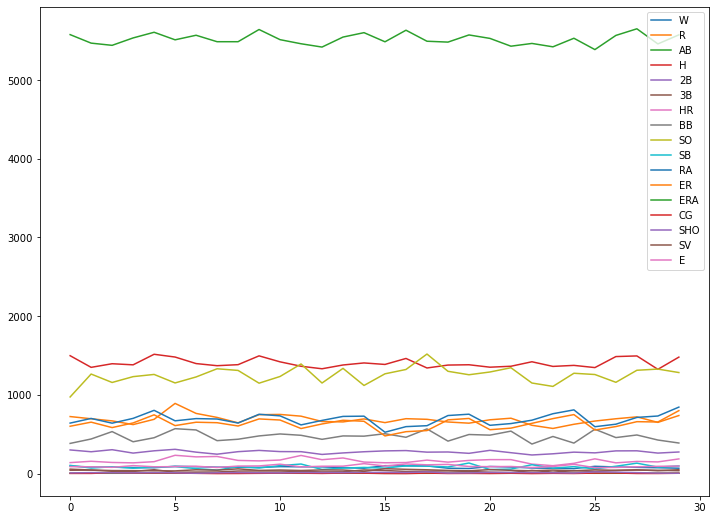

In [105]:
df.plot.line(figsize=(12,9))

`AB` has a highest number of range as compare to other features.

<AxesSubplot:xlabel='R', ylabel='RA'>

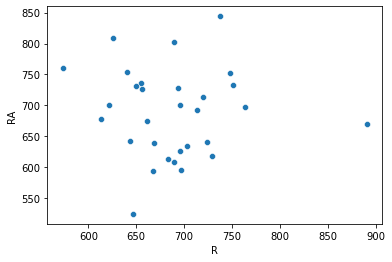

In [106]:
sns.scatterplot(x='R',y='RA',data=df)

Average Run and Runs most fall in range 625 to 750.

<AxesSubplot:xlabel='R', ylabel='SB'>

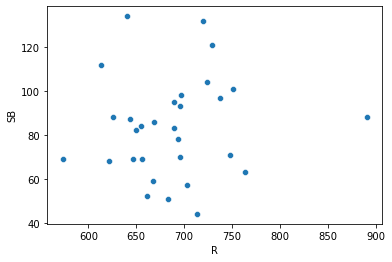

In [107]:
sns.scatterplot(x='R',y='SB',data=df)

At the least Strike out, it could not get minimum runs and similarly at the highest strike out it could not get maximum runs.

<AxesSubplot:xlabel='ERA', ylabel='Density'>

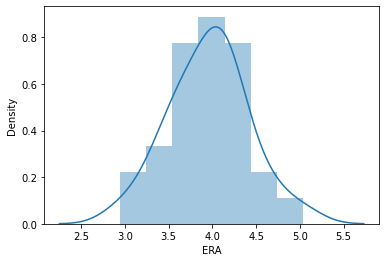

In [108]:
sns.distplot(df['ERA'])

`ERA` seems little skewed to the both side but it is in acceptable range. Otherwise it has perfectly distributed data points.

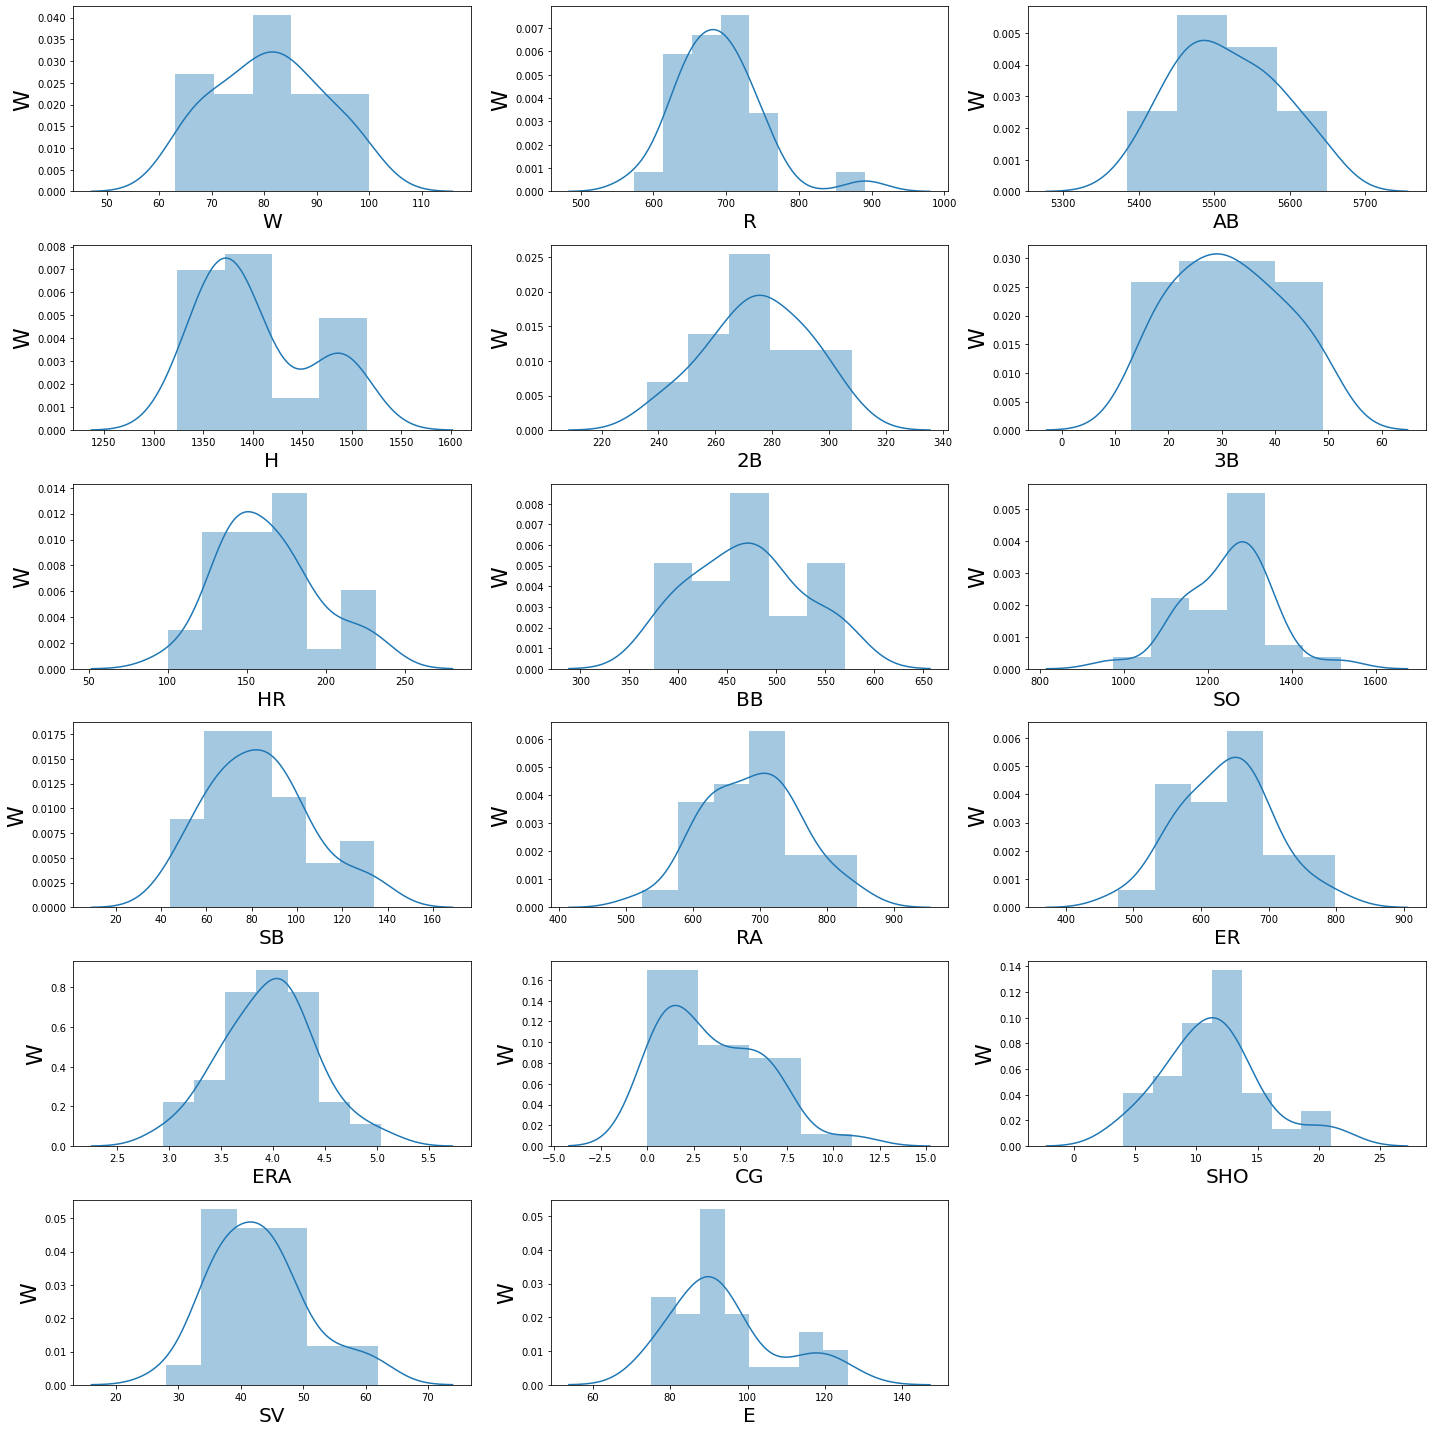

In [109]:
plt.figure(figsize=(20,20))
plotnumber=1
for  i in df.columns:
    if plotnumber<100:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(x=df[i])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('W',fontsize=22)
    plotnumber+=1
plt.tight_layout()

## Insight the graph:
- `W` Our target is perfectly equaly distributed.
- `R` runs is enough right skewed.
- seems `SO` is both side skewed.
- `CG` is also little right skewed.

## Checking Outliers:


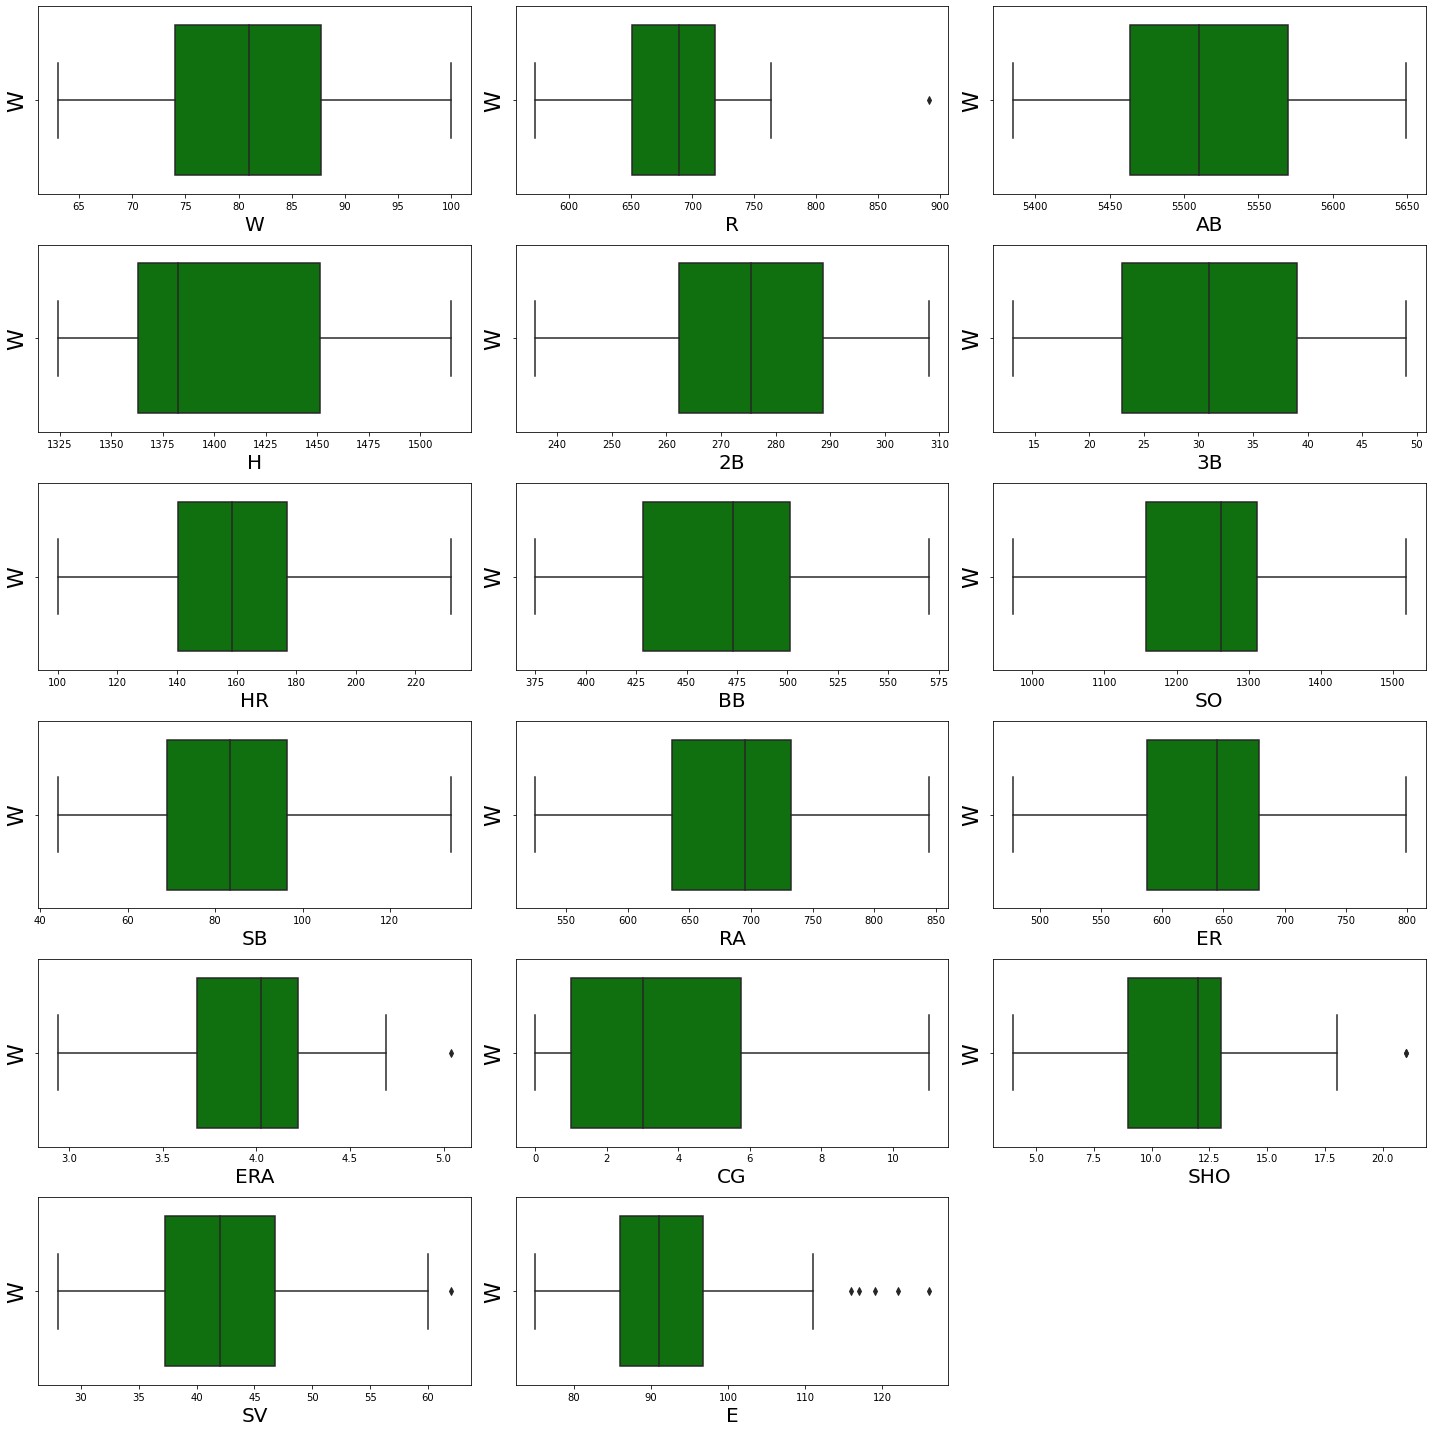

In [110]:
plt.figure(figsize=(20,20))
plotnumber=1
for  i in df.columns:
    if plotnumber<100:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(x=df[i],color='g')
        plt.xlabel(i,fontsize=20)
        plt.ylabel('W',fontsize=22)
    plotnumber+=1
plt.tight_layout()

## Observation:
- As we predicted `R` has outlier present.
- `SV`, `ERA` and `SHO` also have outliers.
- `E` has good numbers of outlier present.

## Removing Outliers:

In [111]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(30, 17)

In [112]:
threshold=3
df_new=df[(z<threshold).all(axis=1)]
print('Previous Shape : ',df.shape)
print('After Removing outliers, shape : ',df_new.shape)

Previous Shape :  (30, 17)
After Removing outliers, shape :  (29, 17)


## Data Loss:


In [113]:
loss=((30-29)/30)*100
print('The Data loss precentage is : ', loss)

The Data loss precentage is :  3.3333333333333335


The precentage of dataloss is in acceptable range.



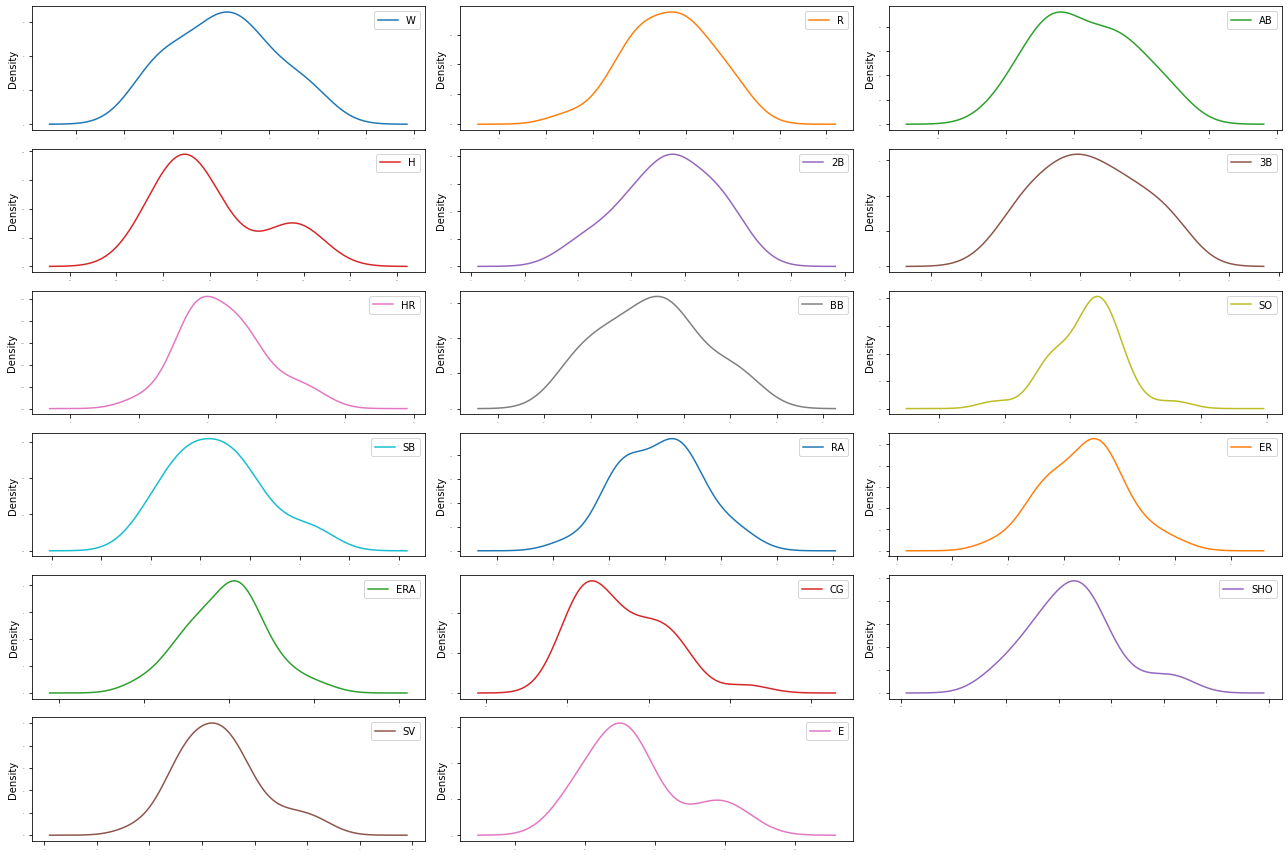

In [114]:
## checking the distribution after removing outliers and removing skewness
df_new.plot(kind='density',subplots=True, layout=(6,3),sharex=False,legend=True,fontsize=1,figsize=(18,12))
plt.tight_layout()

## Checking skewness:

In [115]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

if our features skewness is in the range of -0.5 to  +0.5  then we consider it as a acceptable range. But here some columns are in the out of range we have to handle their skeweness.

## Removing skewness using Power Transformation

In [116]:
## 'SHO' and SV using Cbrt method and other by power tranformation
df_new['SHO']=np.cbrt(df_new['SHO'])
df_new['SV']=np.cbrt(df_new['SV'])

In [117]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO   -0.298136
SV     0.280963
E      0.840271
dtype: float64

In [118]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [119]:
for i in df_new.columns:
    if np.abs(df_new[i].skew())>0.5:
        df_new[i]=pt.fit_transform(df_new[i].values.reshape(-1,1))

In [120]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO   -0.298136
SV     0.280963
E      0.065585
dtype: float64

Now the skewness has been removed.

<Figure size 1440x1440 with 0 Axes>

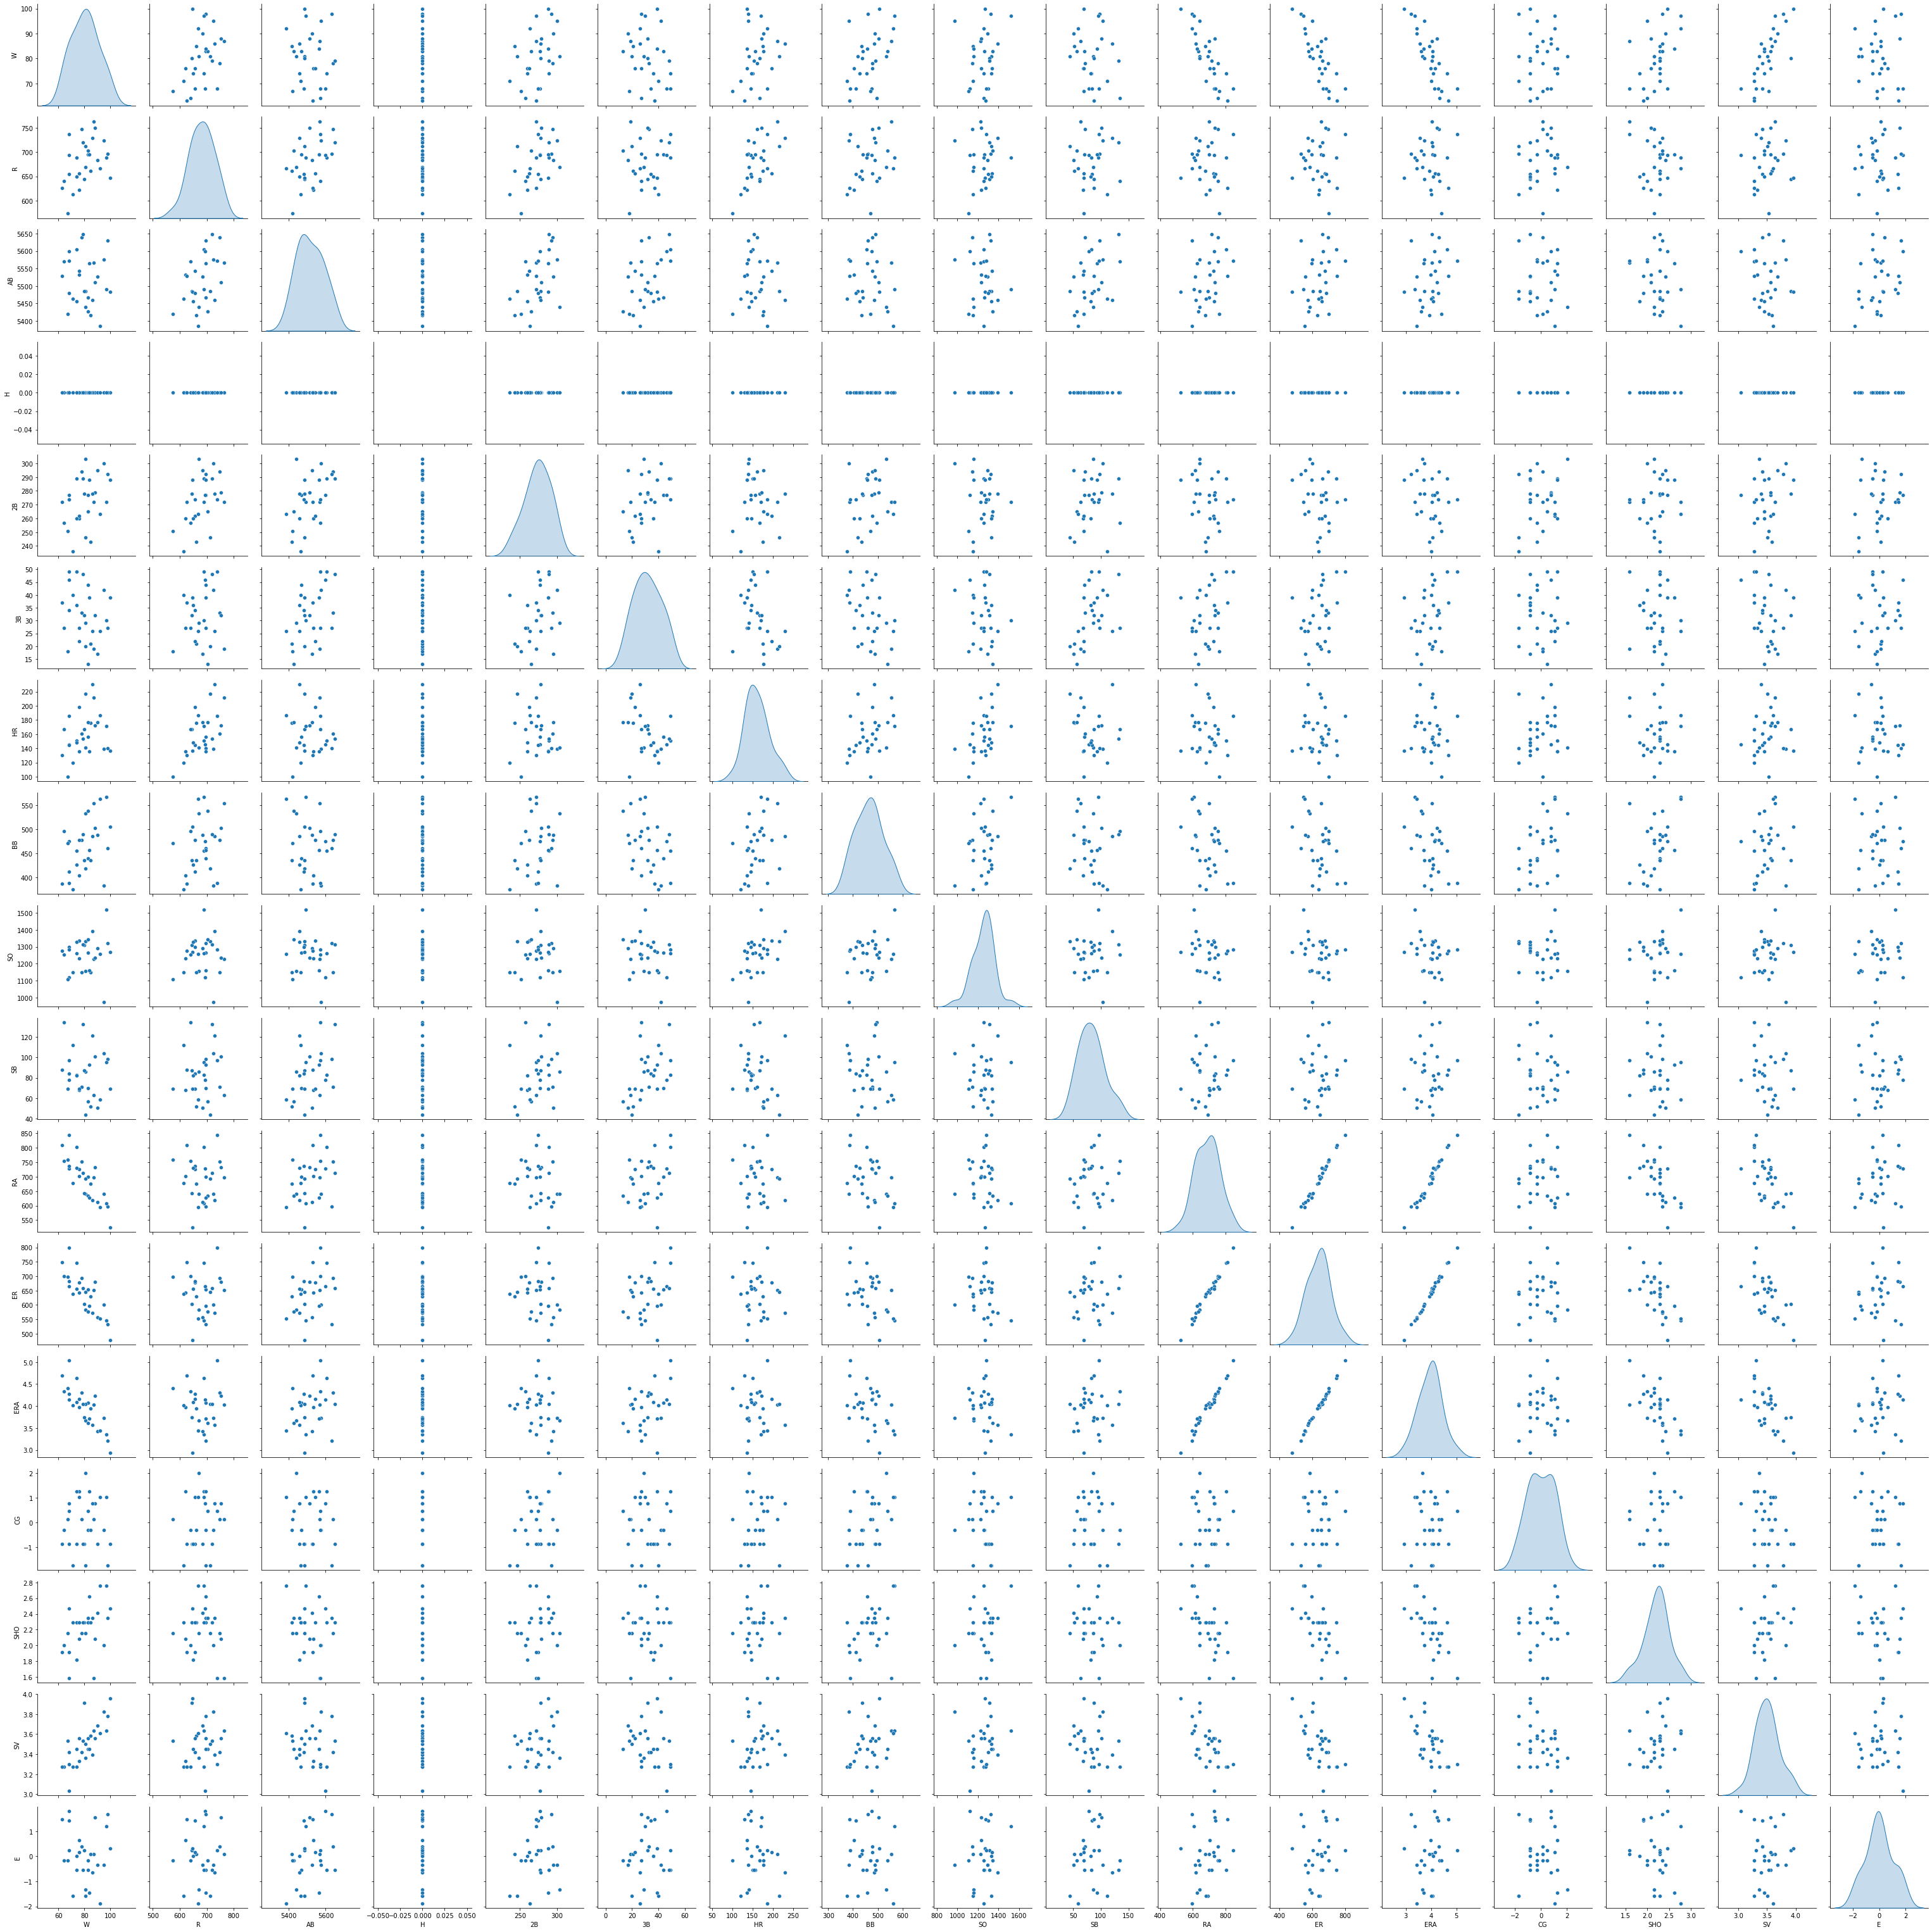

In [121]:
## pair plot
plt.figure(figsize=(20,20))
sns.pairplot(df_new,diag_kind='kde')
plt.tight_layout()

## Observation:
Just because we have little huge number of feature, so it is little difficult to visualize it. But we can see that in the middle of it some feature are tightly showing a good positive trend with eachother.

## Plotting heatmap

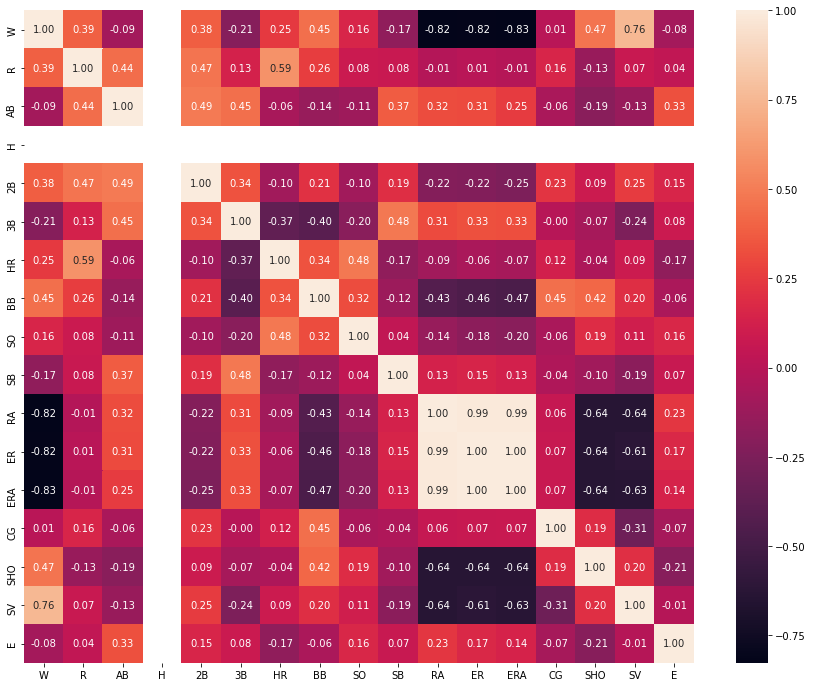

In [122]:
plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',linecolor='b')
plt.show()

## Observation of Heatmap:
- In the begning we have seen that `H` (hits) feature is 0.03% correlate with our target variable and after removing it skewness it cleanout with datapoints. So we will drop as going ahead.
- In positive manner `SV` is highest correlated with Target `W`  having 76%.
- In negative, `ERA`,`ER` and `RA` features are highly negative correlated with our target variable.
- Also we can see in the heatmap that `RA` is 99% correlate with `ER` and `ERA`. It mean that there is a multicolliearity problem exist.
- Also `ER` is 100% correlate with `ERA`.

## checking the relation ER vs RA and ERA vs RA

<AxesSubplot:xlabel='ER', ylabel='RA'>

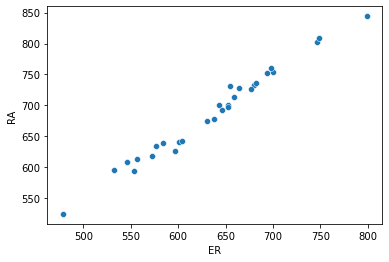

In [123]:
sns.scatterplot(x='ER',y='RA',data=df_new)

<AxesSubplot:xlabel='ERA', ylabel='RA'>

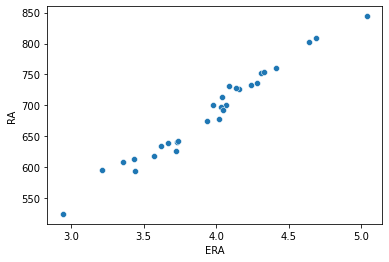

In [124]:
sns.scatterplot(x='ERA',y='RA',data=df_new)

We can see that `RA` has good relation with `ERA` and `ER`

<AxesSubplot:xlabel='ER', ylabel='ERA'>

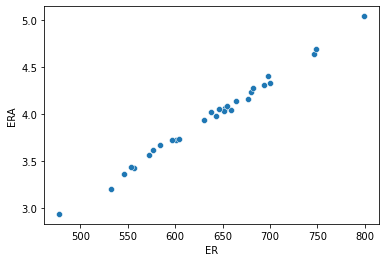

In [125]:
sns.scatterplot(x='ER',y='ERA',data=df_new)

`ER` and `ERA` is strongly correlated with eachother.

## Visualize the correlation with target.

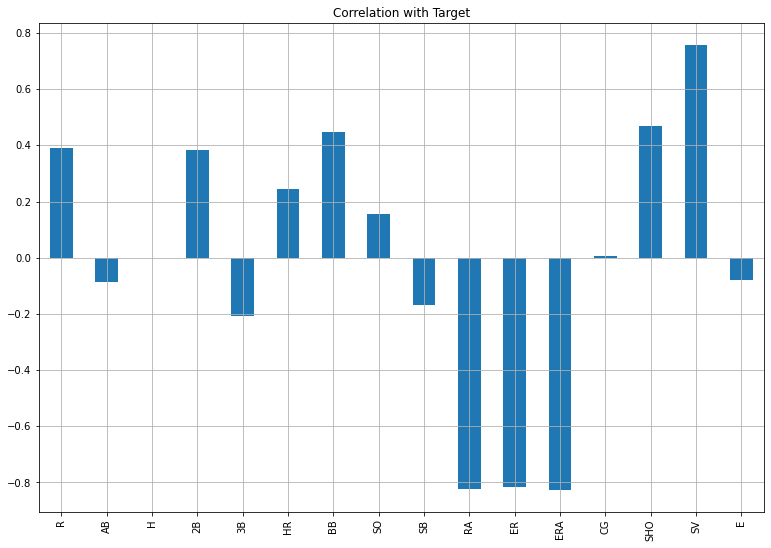

In [126]:
df_new.drop('W',axis=1).corrwith(df.W).plot(kind='bar',grid=True,figsize=(13,9),title='Correlation with Target')
plt.show()

## Dropping Column
- though `H` is not related to our target variable so that we are going to drop it right now.

In [127]:
df_new=df_new.drop(columns=['H'],axis=1)
df_new

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,-0.307098,2.000000,3.825862,-0.348265
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,-0.307098,2.289428,3.556893,-0.540820
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,2.011315,2.154435,3.361975,-1.326125
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,1.264463,2.080084,3.332222,0.650818
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,1.264463,2.289428,3.271066,-0.540820
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,0.121871,1.587401,3.634241,0.082858
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,-1.732896,2.154435,3.503398,-1.588197
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,-0.870682,2.289428,3.914868,0.237592
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,0.121871,2.154435,3.419952,0.383386
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,0.770649,2.080084,3.556893,1.554265


# Model Building:



### splitting the dataset:

In [128]:
x=df_new.drop('W',axis=1)
y=df_new['W']
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,-0.307098,2.000000,3.825862,-0.348265
1,696,5467,277,44,156,439,1264,70,700,653,4.07,-0.307098,2.289428,3.556893,-0.540820
2,669,5439,303,29,141,533,1157,86,640,584,3.67,2.011315,2.154435,3.361975,-1.326125
3,622,5533,260,27,136,404,1231,68,701,643,3.98,1.264463,2.080084,3.332222,0.650818
4,689,5605,289,49,151,455,1259,83,803,746,4.64,1.264463,2.289428,3.271066,-0.540820
6,764,5567,272,19,212,554,1227,63,698,652,4.03,0.121871,1.587401,3.634241,0.082858
7,713,5485,246,20,217,418,1331,44,693,646,4.05,-1.732896,2.154435,3.503398,-1.588197
8,644,5485,278,32,167,436,1310,87,642,604,3.74,-0.870682,2.289428,3.914868,0.237592
9,748,5640,294,33,161,478,1148,71,753,694,4.31,0.121871,2.154435,3.419952,0.383386
10,751,5511,279,32,172,503,1233,101,733,680,4.24,0.770649,2.080084,3.556893,1.554265


## Conclusion:
As we see multicolinearity exist in our dataset. But we are not in the situation to drop any  column if it is more than 82 % correlate with our target variable. 

so now we will use the PCA for get rid off to multicolliearity problem.PCA will take care of it.

### Aplying PCA

## Standarize the Data:

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [130]:
for  i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head()
    

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.756001,1.586882,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.274630,0.270050,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.206072,-0.684238,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.470829,-0.829907,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.274630,-1.129315,-0.540820


In [146]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [132]:
from sklearn.decomposition import PCA
pca=PCA()

In [133]:
pca.fit_transform(x)

array([[ 2.84904282e-01, -2.01791812e+00, -2.66611604e+00,
        -4.42848445e-01, -2.67678366e+00,  2.79328469e-01,
         7.88370110e-01, -2.29047149e-01,  7.28490178e-01,
        -3.05526338e-01,  7.11796561e-01, -1.27774041e-01,
        -4.52502784e-02,  8.72624600e-02, -1.00330259e-02],
       [ 2.45239995e-01,  9.17410789e-02, -3.93144323e-01,
         4.80067371e-02, -4.55336810e-01,  5.83736233e-01,
        -1.05734497e+00, -1.05843566e+00,  1.72979214e-03,
        -3.12267245e-01, -5.07620948e-01, -1.72783624e-01,
        -1.08466264e-01,  2.08804466e-02,  4.48744496e-02],
       [-1.32962815e+00, -4.88443469e-01, -1.17649439e-01,
         2.83335082e+00, -9.40970423e-01, -3.35509055e-01,
         1.30694929e+00, -8.22409918e-01, -3.02772874e-02,
         1.14285873e+00, -5.36374495e-01, -7.61807866e-02,
         1.42043937e-01,  1.47155717e-02,  3.67455481e-03],
       [ 9.39311760e-01,  1.33186480e+00, -4.78398193e-01,
         7.33585608e-01,  3.82141540e-01, -1.23667606

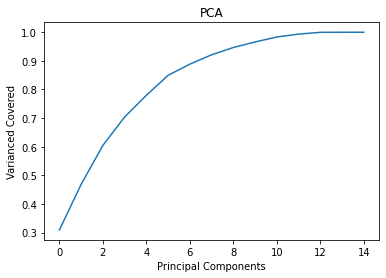

In [134]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

As we can see that around 10 components give us 95%> information. So we will choose components =10.

In [135]:
pca=PCA(n_components=10)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.284904,-2.017918,-2.666116,-0.442848,-2.676784,0.279328,0.788370,-0.229047,0.728490,-0.305526
1,0.245240,0.091741,-0.393144,0.048007,-0.455337,0.583736,-1.057345,-1.058436,0.001730,-0.312267
2,-1.329628,-0.488443,-0.117649,2.833351,-0.940970,-0.335509,1.306949,-0.822410,-0.030277,1.142859
3,0.939312,1.331865,-0.478398,0.733586,0.382142,-1.236676,-0.136828,0.179707,0.567676,0.867525
4,2.872147,-1.318771,0.407610,1.724949,0.108237,0.206157,-1.200866,-0.479738,-1.021875,0.081823
5,-0.194641,-0.811645,2.909880,-1.325873,-1.805602,-0.766600,1.209995,0.428355,-0.208123,-0.284906
6,-0.485680,2.147525,1.858527,-1.903712,-1.296206,1.566621,-1.312672,0.657109,-0.169811,0.316913
7,-1.370901,0.250776,-1.072382,-1.497826,0.239474,0.131147,0.032680,-1.006390,-0.418970,-0.370311
8,1.583935,-1.931216,0.610922,0.109376,-1.268707,-0.917610,-0.540222,0.897796,-0.458491,-0.042614
9,0.877424,-1.446153,1.242357,-0.159223,0.191463,-0.901703,0.803581,-0.351983,0.764920,-1.079256


## importing the libraries:

In [136]:
from sklearn.model_selection import train_test_split as tts


In [137]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [138]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [139]:
## finding the best random state
## define a function which return us the best random state
def random_state(feature,target):
    maximum=1000
    for i in range(1,1000):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.20,random_state=i)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        mse=MSE(y_test,pred)
        if maximum>mse:
            maximum=mse
           
    return i
            
        


In [155]:
#random_state(x,y)
random_state(x_comp,y)

999

In [141]:
## Creating a list having all models:
all_model=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(), AdaBoostRegressor(),
           GradientBoostingRegressor(),DecisionTreeRegressor(),SVR(),XGBRegressor(),Lasso(),Ridge()]
model_name=['linear regression','k-nearest neighbors','random forest','adaboost','gradientboosting','decisiontree',
            'svr','xgb','lasso','ridge']

In [142]:
### importing cross validation
from sklearn.model_selection import cross_val_score

In [181]:
## defining a function for model building
def model_building(Models,Features,Target,n):
    x_train,x_test,y_train,y_test=tts(Features,Target,test_size=0.2,random_state=random_state(Features,Target))
    ## creating the empty list
    number=[]
    Mae=[]
    Mse=[]
    Smse=[]
    r2=[]
    MeanCV=[]
    ## building the model
    for i , j in enumerate(Models):
        j.fit(x_train,y_train)
        pred_test=j.predict(x_test)
        ## choosing cv=5
        
        
        
        score=cross_val_score(j,x_train,y_train,cv=5,scoring='r2')
        
        # appending the score with their respective list
        number.append(n[i])
        Mae.append(np.round(MAE(y_test,pred_test),3))
        Mse.append(np.round(MSE(y_test,pred_test),3))
        Smse.append(np.round(np.sqrt(MSE(y_test,pred_test)),3))
        r2.append(np.round(r2_score(y_test,pred_test),2))
        MeanCV.append(np.round(np.mean(score),4))
        
    ## make a dataframe to understand in a better way
    dataframe=pd.DataFrame()
    dataframe['Model_name']=number
    dataframe['Mean Absolute error']=Mae
    dataframe['Mean Squared error']=Mse
    dataframe['SquareRoot of Mean Squared error']=Smse
    dataframe["Model's R2 Score "]=r2
    dataframe['Mean of the Cross Validation']=MeanCV
    dataframe.set_index('Model_name',inplace=True)
    return dataframe
    

## Model's score (Without PCA)

In [182]:
model_building(all_model,x,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,4.344,24.664,4.966,0.86,-5.0072
k-nearest neighbors,6.333,51.387,7.168,0.71,0.3525
random forest,7.298,64.993,8.062,0.63,0.2634
adaboost,5.823,43.450,6.592,0.75,0.2223
gradientboosting,8.812,102.605,10.129,0.42,-0.0451
decisiontree,12.333,202.333,14.224,-0.15,-1.0628
svr,11.614,157.064,12.533,0.11,-0.2066
xgb,5.285,46.419,6.813,0.74,0.0894
lasso,2.711,10.413,3.227,0.94,0.7609


- In this way we can find out that which models are giving good accuracy and finalize the models.
- `Random forest`, `GradientBoosting` and `Lasso` give us the best result.

## Model Score using PCA.

In [183]:
model_building(all_model,x_comp,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,4.334,22.982,4.794,0.87,0.6599
k-nearest neighbors,6.300,50.700,7.120,0.71,0.3086
random forest,5.118,33.315,5.772,0.81,0.0700
adaboost,6.847,58.696,7.661,0.67,-0.0360
gradientboosting,5.548,36.890,6.074,0.79,-0.0836
decisiontree,11.000,144.333,12.014,0.18,-0.7363
svr,11.554,156.188,12.498,0.11,-0.2052
xgb,5.332,30.792,5.549,0.83,0.2000
lasso,2.275,5.740,2.396,0.97,0.3574


` Linear Regression`, `Random Forest`,`XGBregresor`,`Lasso`and `Ridge` give us the best result.
Let's tune the parameter.

### Tunning the parameters.

## XGB

In [184]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.2,random_state=999)
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
score=r2_score(y_test,pred)
score

0.8252665256908125

In [185]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [168]:
grid_param={'learning_rate':[0.0001,0.001,0.01,0.1,1],
           'max_depth':list(range(3,8)),
           'min_child_weight':[3,5,7,9],
           'gamma':[0.1,0.001,0.2,0.3,0.4,0.5,0.6,0.7],
           'colsample_bytree':[0.3,0.5,0.7]}

In [177]:
gcv=GridSearchCV(XGBRegressor(),grid_param)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=N

In [179]:
print(gcv.best_params_)

{'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7}


In [180]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.2,random_state=999)
xgb=XGBRegressor(min_child_weight=7,max_depth=3,learning_rate=0.1,gamma=0.1,colsample_bytree=0.3)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)
print('R2 Score is : ', r2score)

R2 Score is :  0.605973926091073


## Random Forest

In [193]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.2,random_state=999)
grid_param={'n_estimators':[100,200,300,400,500],
           'min_samples_split':[1,2,3,4,5],
           'min_samples_leaf':[1,2,3,4,5,6]}

In [194]:
gcv=GridSearchCV(RandomForestRegressor(),grid_param)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [195]:
print(gcv.best_params_)

{'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [196]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.2,random_state=999)
rf=RandomForestRegressor(min_samples_leaf=3,min_samples_split=4,n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
print('R2 Score is : ', r2score)

R2 Score is :  0.6587740108422446


# Lasso

In [198]:
from sklearn.linear_model import LassoCV , RidgeCV

In [225]:
lasso_cv=LassoCV(alphas=None,max_iter=10000,random_state=None)
lasso_cv.fit(x_train,y_train)

LassoCV(max_iter=10000)

In [226]:
alpha=lasso_cv.alpha_
alpha

0.13525684124064968

In [227]:
lasso=Lasso(alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.13525684124064968)

In [228]:
lasso.score(x_test,y_test)

0.8942590418544762

# Ridge

In [229]:
ridgecv=RidgeCV(alphas=np.arange(0.00001,10,0.1),normalize=True)
ridgecv.fit(x_train,y_train)
alpha=ridgecv.alpha_
ridge=Ridge(alpha)
ridge.fit(x_train,y_train)


Ridge(alpha=0.10001)

In [230]:
ridge.score(x_test,y_test)

0.8739950212451002

## finalize the model
#### Lasso() give us the best result. So we select Lasso as our final model.

In [249]:
lasso=Lasso(alpha=0.13525684124064968)
lasso.fit(x_train,y_train)
prediction=lasso.predict(x_test)
score=cross_val_score(lasso,x_comp,y,cv=4)
score

array([0.06580587, 0.41601119, 0.78551014, 0.94518013])

## Model_Evaluation

In [251]:
print('Mean_Absolute_Error is : ',round(MAE(y_test,prediction),3))
print('Mean_Squared_Error is : ', round(MSE(y_test,prediction),3))

print('Root Mean Sqaured Error is : ', round(np.sqrt(MSE(y_test,prediction)),3))
print('R2 Score of the model is : ', round(r2_score(y_test,prediction),3)*100,'%')
print('Mean of cross validation score is : ', round(np.mean(score),3)*100,'%')

Mean_Absolute_Error is :  3.801
Mean_Squared_Error is :  18.634
Root Mean Sqaured Error is :  4.317
R2 Score of the model is :  89.4 %
Mean of cross validation score is :  55.300000000000004 %


Text(0.5, 1.0, 'Lasso Model prediction')

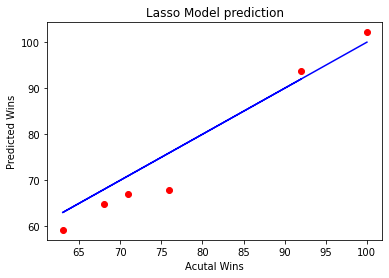

In [252]:
plt.scatter(x=y_test,y=prediction,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal Wins')
plt.ylabel('Predicted Wins')
plt.title('Lasso Model prediction')

# Saving the model

In [253]:
import joblib
joblib.dump(lasso,'Baseball_win_prediction')

['Baseball_win_prediction']